# Ridge, Lasso, & Elastic Net Regression in R
#### This is a practice of what's on https://youtu.be/ctmNq7FgbvI
#### Data is from https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set
#### & https://archive.ics.uci.edu/ml/machine-learning-databases/00551/
#### (gt_2015.csv)

In [1]:
# Read data
GTdata <- read.csv('gt_2015.csv', header=TRUE)
# Cursory check
GTdata

AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.953200,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1.219100,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
0.949150,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
1.007500,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
1.285800,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
1.831900,1021.7,76.411,2.8410,23.495,1076.4,549.92,133.58,11.829,2.0812,81.193
2.074000,1022.0,75.974,2.7981,22.945,1073.7,549.98,131.53,11.687,2.2529,83.171
1.782400,1022.6,73.535,2.8327,23.337,1075.7,550.01,133.18,11.745,3.7350,85.749
1.593000,1023.2,72.873,2.8729,23.654,1078.5,550.06,135.38,11.772,3.6398,86.491


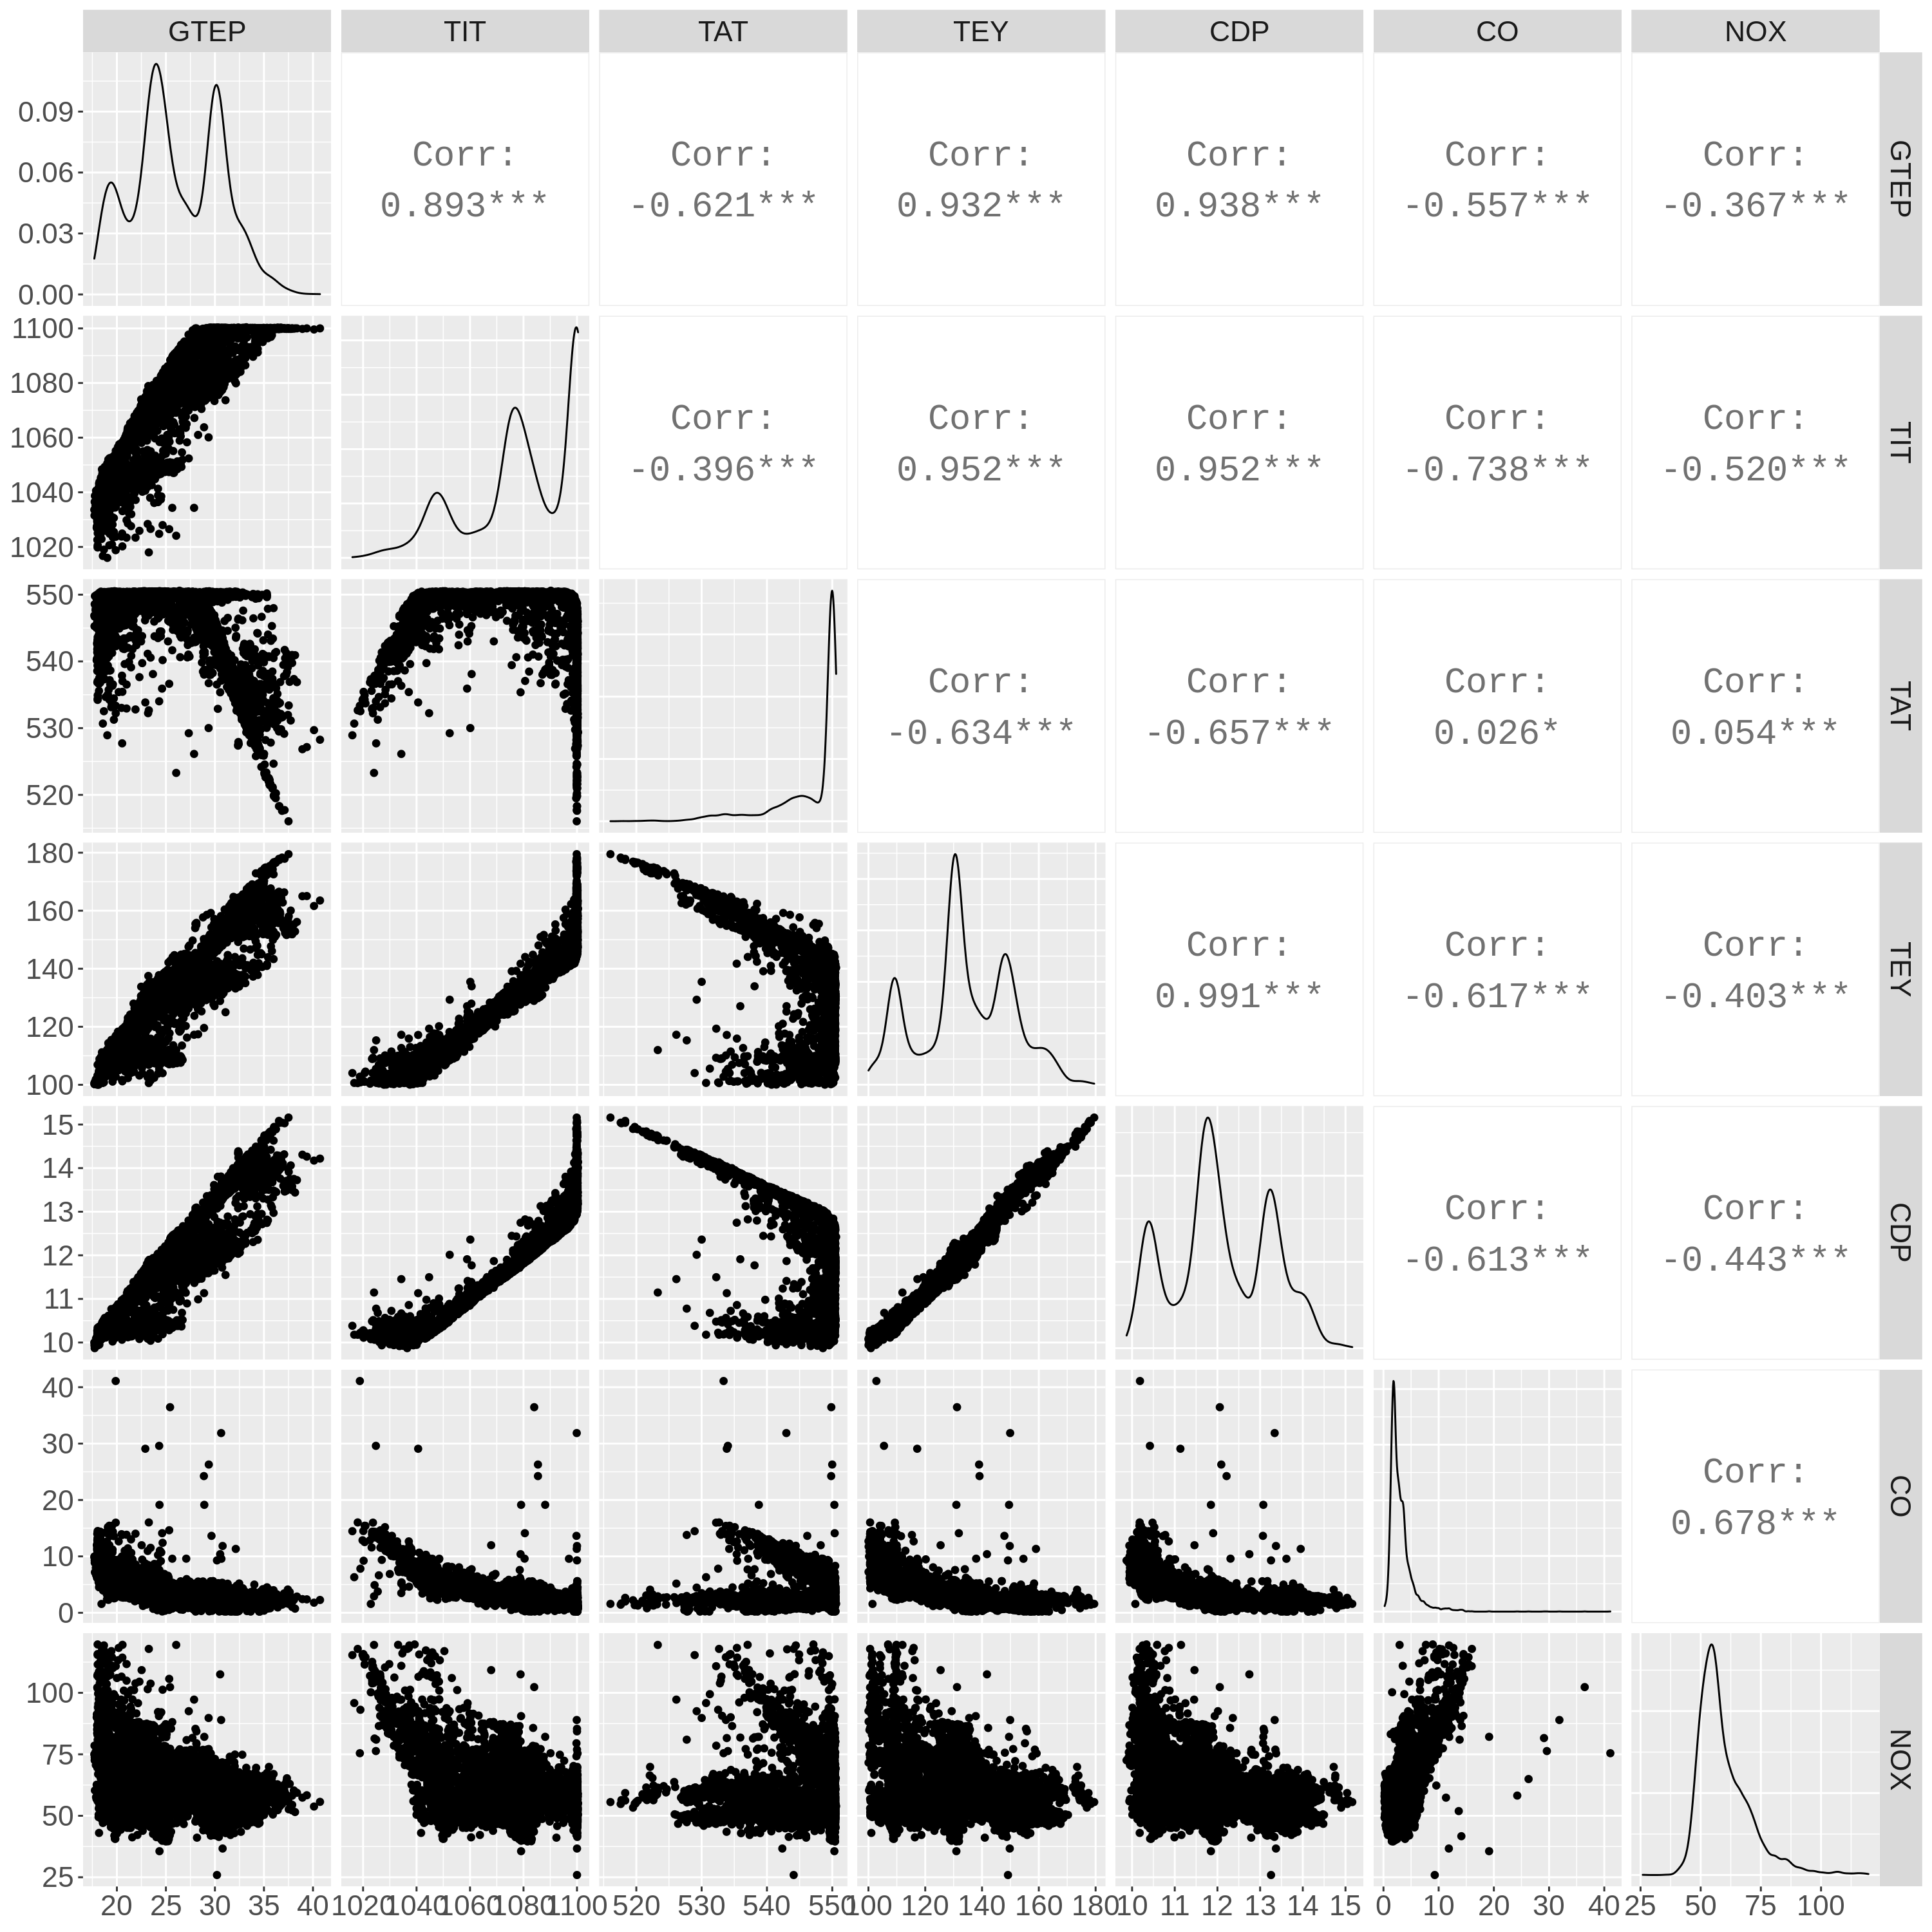

In [3]:
# Matrix plot
library(GGally)
scol = 5    # starting column number (index)
ncol = 7    # the number of columns to plot
psize   = 2.5*(ncol-1)    # 2" per column
options(repr.plot.height=psize, repr.plot.width=psize,repr.plot.res = 200)
ggpairs(GTdata[,scol:(scol+ncol-1)], diag = list(continuous = "densityDiag"), upper = list(continuous = wrap('cor', size=7))) +
                                                                                      theme(text = element_text(size = 20))

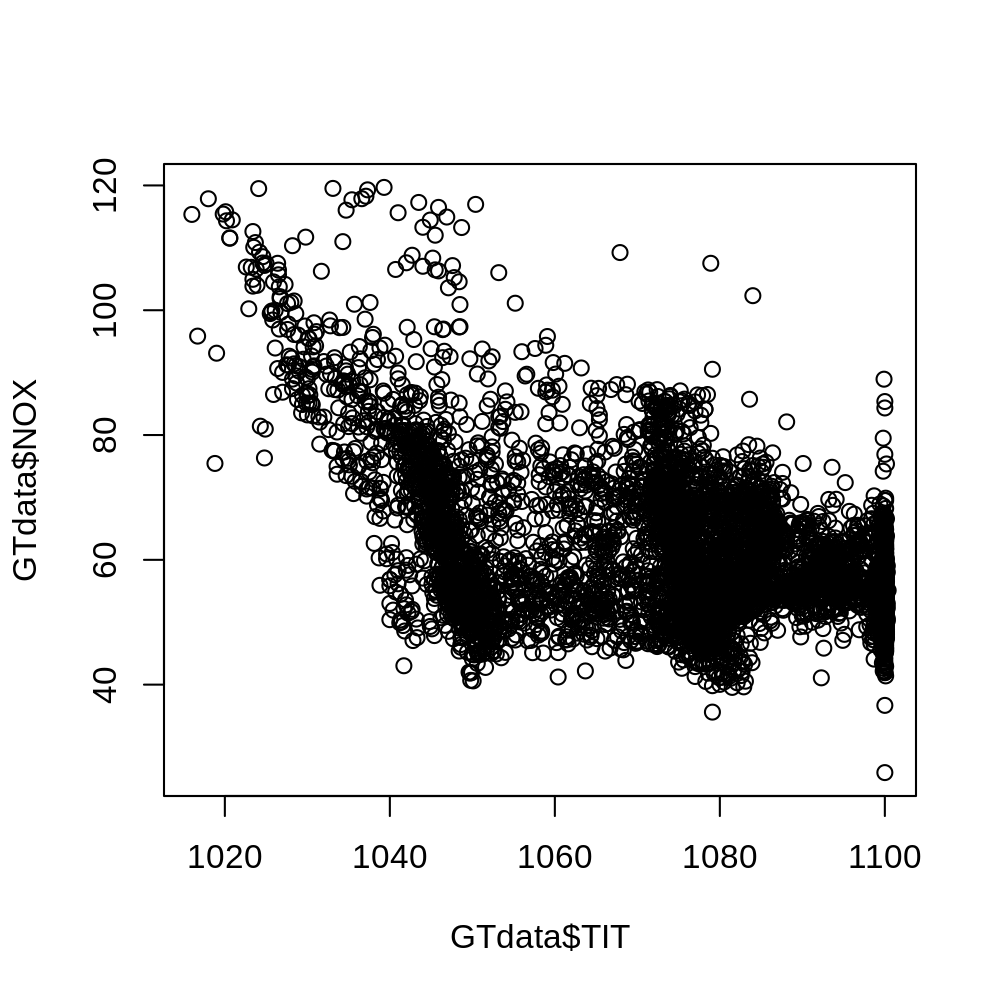

In [5]:
# Plot 'NOX'(y) vs 'TIT'(x)
options(repr.plot.height=5, repr.plot.width=5, repr.plot.res = 200)
plot(GTdata$TIT, GTdata$NOX)

In [6]:
# Elastic-Net Regression combines the Lasso Regression penalty and Ridge Regression Penalty.
#
#     the sum of the squared residuals
#   + lambda1 * ( abs(variable1) + abs(variable2) + ... )
#   + lambda2 * (   variable1^2  +   variable2^2  + ... )
#
# glmnet uses a single lambda instead, and another parameter called alpha.
#
#     the sum of the squared residuals
#   + lambda * [ alpha * ( abs(variable1) + abs(variable2) + ... )
#              + (1-alpha) * ( variable1^2 + variable2^2 + ... ) ]
#
# When alpha = 0 or 1 we get either Ridge or Lasso Regression. Anything other than 0 or 1, we get Elastic Net.

## Prep data

In [7]:
# Split the data into 2 parts - train and test, 80:20
train_endRow  = round(nrow(GTdata)*0.8,0)
test_beginRow = round(nrow(GTdata)*0.8,0)+1
# Convert dataframe to matrix. glmnet likes matrix.
x.train = data.matrix( GTdata[1:train_endRow, 1:10] )
y.train = data.matrix( GTdata[1:train_endRow, 11] )

x.test  = data.matrix( GTdata[ test_beginRow:nrow(GTdata), 1:10] )
y.test  = data.matrix( GTdata[ test_beginRow:nrow(GTdata), 11] )

## Ridge Regression (alpha=0)

In [9]:
# Predict NOX using the rest of data
# Load the glmnet library.
library(glmnet)

# Set a seed for the random number generator so that I get the same results later.
set.seed(2580)

# CV means we want to use Cross Validation to obtain the optimal values for lambda.
# By default, cv.glmnet() uses 10-Fold CV.
#
# Unlike the lm() or glm(), cv.glmnet() does not accept formula notation using '~'.
# x and y must be passed in separately in matrix.
#
# type.measure='mse' : use mean squared error for cross validation evaluation.
# ElasticNet for Logistic Regression, use type.measure='deviance'.
#
# alpha=0 makes it Ridge Regression.
#
# family='gaussian' tells glmnet that we are doing Linear Regression.
# For Logistic Regression, use family='binomial'.
alpha0.fit <- cv.glmnet(x.train, y.train, type.measure='mse', alpha=0, family='gaussian')

In [10]:
# Show what alpha0.fit produced
alpha0.fit


Call:  cv.glmnet(x = x.train, y = y.train, type.measure = "mse", alpha = 0,      family = "gaussian") 

Measure: Mean-Squared Error 

    Lambda Measure    SE Nonzero
min 0.7576   38.38 1.262      10
1se 1.2064   39.45 1.192      10

In [11]:
# Predict using the model.
# Use alpha0.fit.
#
# s for 'size' of the penalty (lambda). lambda.1se is, ina statistical sense, indistinguishable from lambda.min, 
# but it results in a model with fewer parameters.
#
# newx is literally the new x matrix.
alpha0.predicted <- predict(alpha0.fit, s=alpha0.fit$lambda.1se, newx=x.test)

In [12]:
# Calcualte mean squared error
mean((y.test - alpha0.predicted)^2)

[1] 59.60187

In [13]:
# Check the resulting coefficients.
coef(alpha0.fit, s='lambda.1se')

11 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) 81.69323072
AT          -0.76804967
AP          -0.13137191
AH          -0.17960999
AFDP        -1.70957813
GTEP         0.07704088
TIT          0.01216327
TAT          0.22179350
TEY          0.01666052
CDP         -0.04874866
CO           1.86918247

## Lasso Regression (alpha=1)

In [14]:
# Predict NOX using the rest of data
# Load the glmnet library.
library(glmnet)

# Set a seed for the random number generator so that I get the same results later.
set.seed(2580)

# CV means we want to use Cross Validation to obtain the optimal values for lambda.
# By default, cv.glmnet() uses 10-Fold CV.
#
# Unlike the lm() or glm(), cv.glmnet() does not accept formula notation using '~'.
# x and y must be passed in separately in matrix.
#
# type.measure='mse' : use mean squared error for cross validation evaluation.
# ElasticNet for Logistic Regression, use type.measure='deviance'.
#
# alpha=0 makes it Ridge Regression.
#
# family='gaussian' tells glmnet that we are doing Linear Regression.
# For Logistic Regression, use family='binomial'.
alpha1.fit <- cv.glmnet(x.train, y.train, type.measure='mse', alpha=1, family='gaussian')

In [15]:
# Show what alpha0.fit produced
alpha1.fit


Call:  cv.glmnet(x = x.train, y = y.train, type.measure = "mse", alpha = 1,      family = "gaussian") 

Measure: Mean-Squared Error 

      Lambda Measure    SE Nonzero
min 0.000758   34.27 1.220      10
1se 0.021578   35.40 1.377       8

In [16]:
# Predict using the model.
# Use alpha1.fit.
#
# s for 'size' of the penalty (lambda). lambda.1se is, ina statistical sense, indistinguishable from lambda.min, 
# but it results in a model with fewer parameters.
#
# newx is literally the new x matrix.
alpha1.predicted <- predict(alpha1.fit, s=alpha1.fit$lambda.1se, newx=x.test)

In [17]:
mean((y.test - alpha1.predicted)^2)

[1] 67.00744

In [18]:
# Check the resulting coefficients.
coef(alpha1.fit, s='lambda.1se')

11 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) -73.6042010
AT           -1.3682196
AP           -0.2751224
AH           -0.2734966
AFDP          4.4491053
GTEP          .        
TIT           0.4874719
TAT           .        
TEY          -0.7851590
CDP           1.0020302
CO            2.1781886

## Elastic Net Regression (alpha=0.5)

In [19]:
# Predict NOX using the rest of data
# Load the glmnet library.
library(glmnet)

# Set a seed for the random number generator so that I get the same results later.
set.seed(2580)

# CV means we want to use Cross Validation to obtain the optimal values for lambda.
# By default, cv.glmnet() uses 10-Fold CV.
#
# Unlike the lm() or glm(), cv.glmnet() does not accept formula notation using '~'.
# x and y must be passed in separately in matrix.
#
# type.measure='mse' : use mean squared error for cross validation evaluation.
# ElasticNet for Logistic Regression, use type.measure='deviance'.
#
# alpha=0 makes it Ridge Regression.
#
# family='gaussian' tells glmnet that we are doing Linear Regression.
# For Logistic Regression, use family='binomial'.
alpha0.5.fit <- cv.glmnet(x.train, y.train, type.measure='mse', alpha=0.5, family='gaussian')

In [20]:
# Predict using the model.
# Use alpha0.5.fit.
#
# s for 'size' of the penalty (lambda). lambda.1se is, ina statistical sense, indistinguishable from lambda.min, 
# but it results in a model with fewer parameters.
#
# newx is literally the new x matrix.
alpha0.5.predicted <- predict(alpha1.fit, s=alpha0.5.fit$lambda.1se, newx=x.test)

In [21]:
mean((y.test - alpha0.5.predicted)^2)

[1] 67.27596

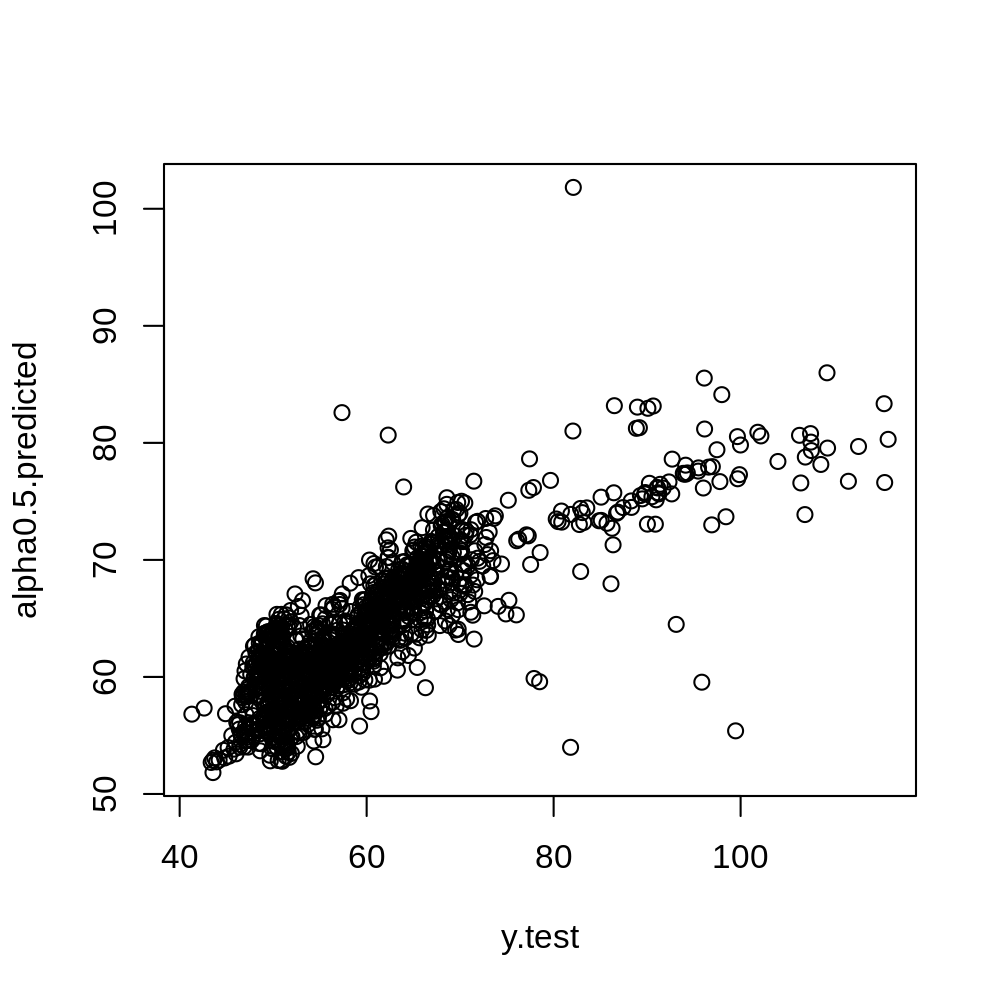

In [22]:
# Plot 'y.test'(y) vs 'alpha0.5.predicted'(x)
options(repr.plot.height=5, repr.plot.width=5, repr.plot.res = 200)
plot(y.test, alpha0.5.predicted)

In [23]:
# Check the resulting coefficients.
coef(alpha0.5.fit, s='lambda.1se')

11 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) -56.2186767
AT           -1.3591241
AP           -0.2738614
AH           -0.2746304
AFDP          4.7425625
GTEP          .        
TIT           0.3149243
TAT           0.2323332
TEY          -0.7245748
CDP           3.5855457
CO            2.1788846

## Elastic Net Regression with different alpha

In [24]:
list.of.fits <- list()

n_split <- 20
for (i in 0:n_split) {
    # First, paste together a name for the Elastic-Net fit that we are going to create
    fit.name <- paste0('alpha', i/n_split)
    
    # Create Elastic-Net fit using cv.glmnet() function.
    list.of.fits[[fit.name]] <- cv.glmnet(x.train, y.train, type.measure='mse', alpha=i/n_split, family='gaussian')
}

In [25]:
# Create an empty data.frame, called results, that will store the mean squared errors and a few other things.
results <- data.frame()

# User another for loop to predict values using the Testing dataset and to claculate the mean squared errors.
for (i in 0:n_split) {
    fit.name <- paste0('alpha', i/n_split)
    
    predicted <- predict(list.of.fits[[fit.name]], s=list.of.fits[[fit.name]]$lambda.1se, newx=x.test)
    
    # Measure mean squared error for the fit.
    mse <- mean((y.test-predicted)^2)
    
    temp <-data.frame(alpha=i/n_split, mse=mse, fit.name=fit.name)
    results <- rbind(results, temp)
}

results

alpha,mse,fit.name
<dbl>,<dbl>,<fct>
0.00,59.60187,alpha0
0.05,61.33230,alpha0.05
0.10,67.10220,alpha0.1
0.15,63.64265,alpha0.15
0.20,66.39958,alpha0.2
0.25,67.14331,alpha0.25
0.30,67.26198,alpha0.3
0.35,67.42224,alpha0.35
0.40,67.46855,alpha0.4
